In [1]:
# google_play_scraperのインストール
!pip install google_play_scraper

In [2]:
# ライブラリの読み込み
from google_play_scraper import app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [3]:
# google_play_scraperでレビュー取得
from google_play_scraper import Sort, reviews_all

# 「モンハンNow - Google Play」からレビューを取得する
jp_reviews = reviews_all(
    'com.nianticlabs.monsterhunter',
    sleep_milliseconds=0,  # defaults to 0
    lang='ja',  # defaults to 'en'
    country='jp',  # defaults to 'us'
    sort=Sort.NEWEST,  # defaults to Sort.MOST_RELEVANT
)

In [6]:
# 取得したレビューをデータフレームに格納
df_bush = pd.DataFrame(np.array(jp_reviews), columns=['review'])
df_bush = df_bush.join(pd.DataFrame(df_bush.pop('review').tolist()))

## 01.月別スコアの集計


### 運用開始日から現在までのスコア推移を棒グラフで表示

In [5]:
df = df_bush[['at', 'score', 'content']]
df.head()


,at,score,content
0,2023-11-05 06:17:49,1,当たり判定が時折悪くダメージが入らないことがある。
1,2023-11-05 06:01:35,4,面白いんだけど応急が足りなくなるからジェムじゃかくて金で買わせて欲しいです。 追記 レイギエ...
2,2023-11-05 05:50:02,2,おもしろいけど、、素材ストッパーがつよすぎてハンターランクだけあがっていってます 田舎だとパ...
3,2023-11-05 05:28:01,1,回復薬が課金アイテムで、もちろんダメージを喰らわなければ良いのですが、たまに回避が出ないこと...
4,2023-11-05 05:27:52,5,楽しいですね!


In [8]:
df['score'].value_counts()  # ユニーク値（score）のカウント

1    1719
5    1426
3    1084
2    1060
4     931
Name: score, dtype: int64

In [9]:
# 日別でスコア数を表示
df_score = df[['at', 'score']]

# crosstableでscoreを横軸に変換
df_score = pd.crosstab(df['at'], df['score'], dropna=False)

# resampleで日付毎に
df_score = df_score.resample('D').sum()

# 日別スコア データフレームを作成
df_score

score,1,2,3,4,5
at,,,,,
2023-09-13,38,6,14,21,45
2023-09-14,97,47,50,64,200
2023-09-15,68,37,50,61,121
2023-09-16,39,27,41,53,122
2023-09-17,37,26,41,48,78
2023-09-18,53,20,34,41,68
2023-09-19,27,27,26,36,37
2023-09-20,29,26,32,30,40
2023-09-21,33,21,42,28,53


<Axes: xlabel='at'>

<Figure size 640x480 with 0 Axes>

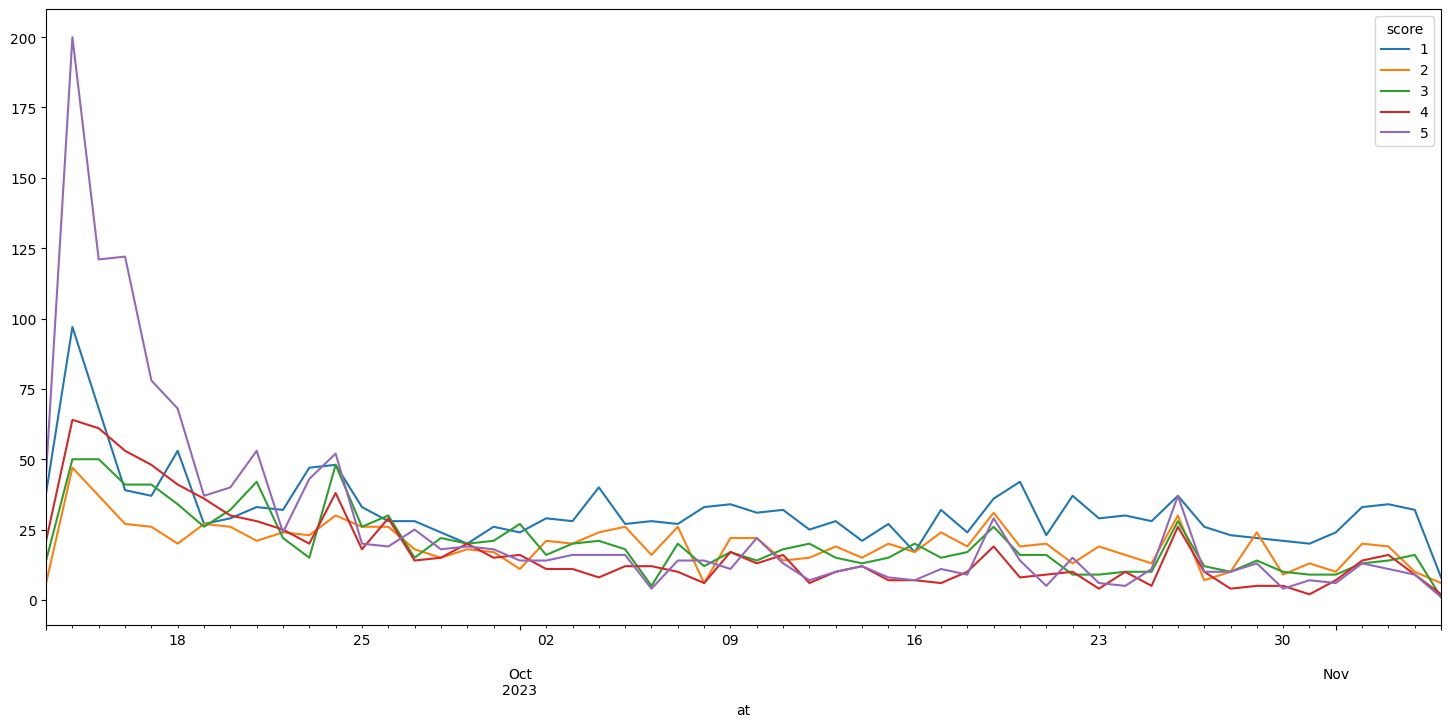

In [10]:
# plotで折れ線グラフを表示
plt.figure()
df_score.plot(figsize=(18,8))

リリース当初
- 高評価が目立つものの、低評価（1~2）も無視できない様子

現在（11月）
- 低評価の方が目立つようになる

### 100%積み上げ棒グラフで月別スコアを集計

In [11]:
# 100%積み上げグラフで表示
# 月別で集計
df_score_month = df_score.resample('M').sum()
df_score_month

score,1,2,3,4,5
at,,,,,
2023-09-30,707,434,549,576,1002
2023-10-31,881,561,482,307,384
2023-11-30,131,65,53,48,40


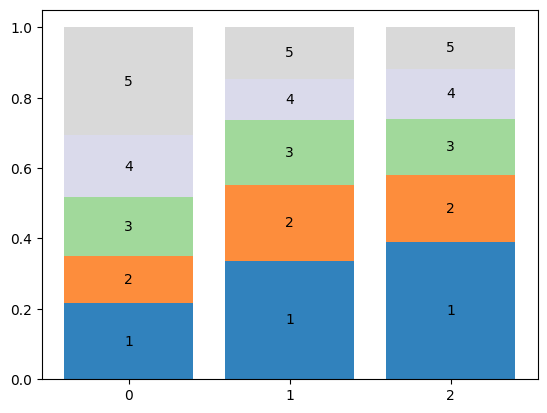

In [12]:
# 100%積み上げグラフ
# 正規化する
df_score_month2 = df_score_month.div(df_score_month.sum(axis=1), axis=0)

n_rows, n_cols = df_score_month2.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df_score_month2.values.dtype)
colors = plt.get_cmap("tab20c")(np.linspace(0, 1, n_cols))

fig, ax = plt.subplots()
ax.set_xticks(positions)

for i in range(len(df_score_month2.columns)):
    # 棒グラフを描画する。
    bar = ax.bar(positions, df_score_month2.iloc[:, i], bottom=offsets, color=colors[i])
    offsets += df_score_month2.iloc[:, i]

    # 棒グラフのラベルを描画する。
    for rect in bar:
        cx = rect.get_x() + rect.get_width() / 2
        cy = rect.get_y() + rect.get_height() / 2
        ax.text(cx, cy, df_score_month2.columns[i], color="k", ha="center", va="center")


まだ折れ線グラフ・棒グラフの可視化から、リリースしてから３ヶ月足らずだが、評価が減少傾向にあることがわかった。

### 直近1カ月間のスコア推移とレビューの表示

In [14]:
# 直近1ヶ月間のスコア推移とレビューの表示
date_start = "2023-10-01"
date_end   = "2023-10-31"

df_score_ex = df_score[date_start:date_end]
df_score_ex

score,1,2,3,4,5
at,,,,,
2023-10-01,24,11,27,16,14
2023-10-02,29,21,16,11,14
2023-10-03,28,20,20,11,16
2023-10-04,40,24,21,8,16
2023-10-05,27,26,18,12,16
2023-10-06,28,16,5,12,4
2023-10-07,27,26,20,10,14
2023-10-08,33,6,12,6,14
2023-10-09,34,22,17,17,11


<Axes: xlabel='at'>

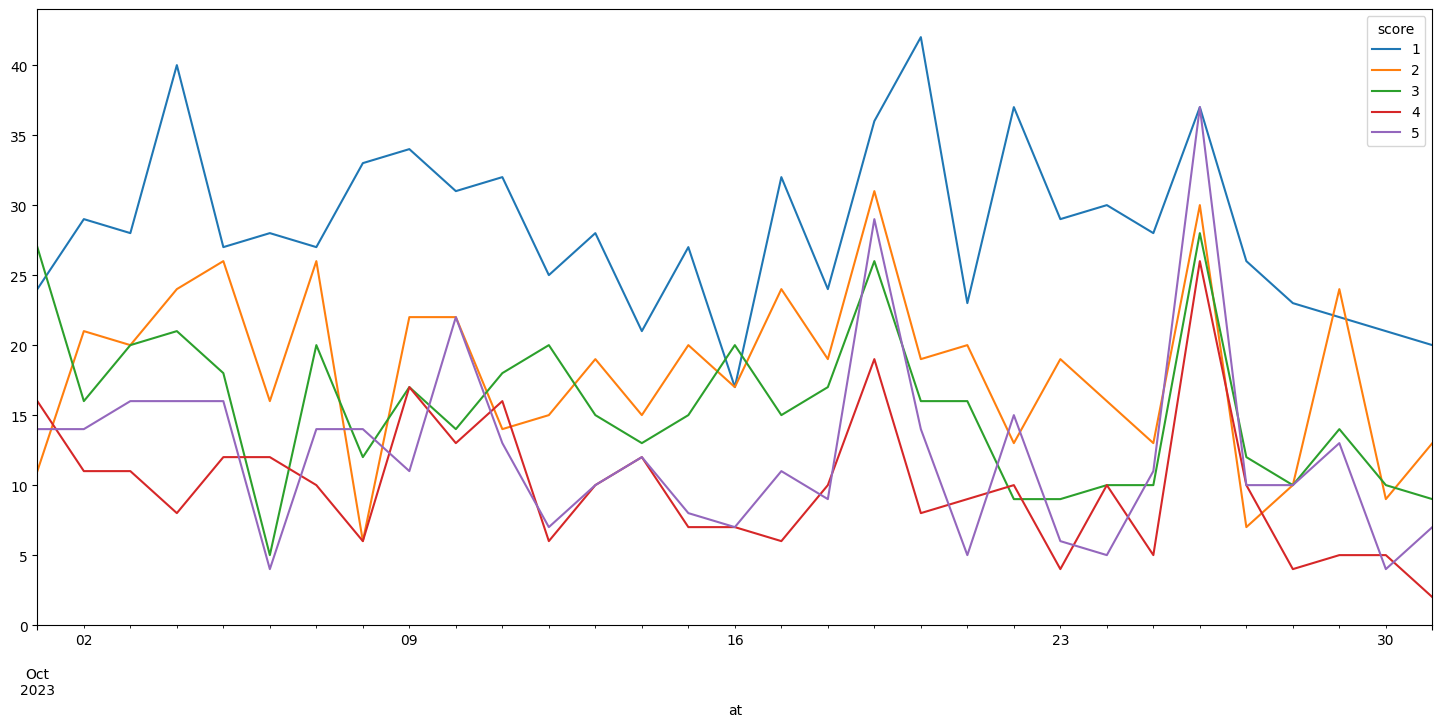

In [15]:
# グラフの表示
df_score_ex.plot(figsize=(18,8))

## 02.テキストマイニング（形態素解析

In [16]:
# 直近1カ月のレビューをデータフレーム化
df1 = df_bush[['at','content']]
df1 = df[(df['at'] > dt.datetime(2023,10,1)) & (df['at'] < dt.datetime(2023,10,31))]

テキストのみ抽出

In [17]:
df1 = df1[['content']]
df1 = df1.rename(columns={'content': 'text'})

MeCabで形態素解析を行う

In [22]:
#インストール
!pip install mecab-python3

#辞書インストール
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658816 sha256=200dfbde95e252932e2dc5f98f1ed3b07fe3981d963ee0112df3024c82ed786c
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [23]:
# MeCabで形態素解析を行う
import MeCab

def mecab_text(text):

    #MeCabのインスタンスを作成（辞書はmecab-ipadic-neologdを使用）
    mecab = MeCab.Tagger('-Owakati')

    #形態素解析
    node = mecab.parseToNode(text)

    #形態素解析した結果を格納するリスト
    wordlist = []

    while node:
        #名詞のみリストに格納する
        if node.feature.split(',')[0] == '名詞':
            wordlist.append(node.surface)
        #形容詞を取得、elifで追加する
        elif node.feature.split(',')[0] == '形容詞':
            wordlist.append(node.surface)
        #動詞を取得、elifで追加する
        #elif node.feature.split(',')[0] == '動詞':
        #    wordlist.append(node.surface)
        node = node.next
    return wordlist

# 形態素結果をリスト化し、データフレームdf1に結果を列追加する
df1['words'] = df1['text'].apply(mecab_text)

# 表示
df1


,text,words
388,楽しく遊んでいたのですが、2-3日前から遊べなくなりました。マップに自分とモンスター、採集ポ...,"[楽しく, 2, 3, 前, マップ, 自分, モンスター, 採集, ポイント, 表示, も..."
389,とにかく高レアのドロップ率が低く装備の更新が出来ない、更にゼニーを稼ぐ方法もデイリーミッショ...,"[レア, ドロップ, 率, 低く, 装備, 更新, ゼニー, 方法, デイリー, ミッション..."
390,面白い事は面白いが体力回復アイテムが乏しいせいでポケモンGOのように気楽に遊べない。 10/...,"[面白い, 事, 面白い, 体力, 回復, アイテム, 乏しい, せい, ポケモン, GO,..."
391,タップとスワイプのみなので通常のモンハンシリーズよりも操作がとても簡単だが、想像以上に楽しめ...,"[タップ, ス, ワイプ, 通常, モンハン, シリーズ, 操作, 想像, 以上, デイリー..."
392,星7のモンスターを倒して出てくる素材が全てレア１ 星1のモンスターを倒して出てくる素材が全て...,"[星, 7, モンスター, 素材, 全て, レア, １, 1, モンスター, 素材, 全て,..."
...,...,...
2947,電車バスで出来ない 移動制限かかった後に直るのが遅い,"[電車, バス, 移動, 制限, 後, 遅い]"
2948,回復アイテムの不足と、狩猟時間が圧倒的に足りないです。。 素材不足もありますが、田舎だと一緒...,"[回復, アイテム, 不足, 狩猟, 時間, 圧倒, 素材, 不足, 田舎, 一緒, 人, ..."
2949,改善要望をみんなで出しましょう。 全体的にはモンハンの世界観を再現していてよいのだが、不満も...,"[改善, 要望, みんな, 全体, モンハン, 世界, 再現, よい, 不満, あり, ①,..."
2950,弓の使用中に照準が定まらずバトルに負けます。どうしたら良いですか？何処でやっても勝手に照準が...,"[弓, 使用, 照準, バトル, 良い, 勝手, 照準, 移動]"


In [25]:
pip install nlplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.9/967.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:00:00


In [26]:
# nlplotで直近1カ月のレビューを可視化・分析
# 頻出単語
import nlplot

npt = nlplot.NLPlot(df1, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)


100%|██████████| 2564/2564 [00:00<00:00, 111421.66it/s]


In [31]:
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [27]:
# 単語数の分布
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)

100%|██████████| 2564/2564 [00:00<00:00, 120025.84it/s]


In [32]:
# ワードクラウド
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
)

In [30]:
# サンバースト
npt.sunburst(
    title='All sentiment sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=800,
    height=600,
    save=True
)